**<span style="font-size:larger;">Demonstration of QCNN</span>**

**Topics**

1. Distinguishing QCNN and CCNN

2. Data Preprocessing

3. Key Components of a QCNN
   - Quantum Layers
     - Quantum Convolution Layer 
     - Quantum Pooling Layer
   - Feature Map
   - QNN Components
4. Training of QCNN 

5. Testing and Evaluation of QCNN

6. References

7. About the Author


# **DISTINGUISHING QCNN AND CNN**

**QCNN vs CNN**

In the classical domain, CNNs are well-established for tasks like image processing. They operate by applying local convolutions to small regions of input data, sequentially processing them with the same filter. The output pixels from these convolutions form a new image-like object, and this process is often accompanied by pooling layers to reduce dimensionality.

On the other hand, QCNNs bring quantum computing into the picture. They encode pixelated images into quantum circuits using specialized feature maps. Quantum convolutional and pooling layers are then applied alternately, gradually reducing the dimensionality until only a single qubit remains for image classification. Unlike classical pooling layers, Quantum Pooling Layers in QCNN perform operations on each qubit until a specific point before discarding certain qubits.

The Quantum Convolutional Layer in QCNN consists of two-qubit unitary operators that identify relationships between qubits in the circuit. Each layer in QCNN incorporates parametrized circuits, enabling adjustments to the output by tuning parameters during training. This parameter tuning is crucial for minimizing the QCNN's loss function, marking a departure from the classical approach where convolutional layers are predetermined.

In essence, QCNNs leverage quantum mechanics to explore parallelism and entanglement, potentially offering advantages over classical CNNs in certain computational aspects. Their distinctive quantum architecture provides a fresh perspective on image processing tasks, pushing the boundaries of what can be achieved in the field of machine learning.

Let's initiate by importing the necessary libraries and packages essential for this tutorial.

In [ ]:
import json
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import clear_output
from qiskit import QuantumCircuit
from qiskit.algorithms.optimizers import COBYLA
from qiskit.circuit import ParameterVector
from qiskit.circuit.library import ZFeatureMap  #ZZfeatureMap, PauliFeatureMap
from qiskit.quantum_info import SparsePauliOp
from qiskit.utils import algorithm_globals
from qiskit_machine_learning.algorithms.classifiers import NeuralNetworkClassifier
from qiskit_machine_learning.neural_networks import EstimatorQNN
from sklearn.model_selection import train_test_split


C:\Users\riakh\AppData\Local\Temp\ipykernel_22452\240051960.py:6: DeprecationWarning: ``qiskit.algorithms`` has been migrated to an independent package: https://github.com/qiskit-community/qiskit-algorithms. The ``qiskit.algorithms`` import path is deprecated as of qiskit-terra 0.25.0 and will be removed no earlier than 3 months after the release date. Please run ``pip install qiskit_algorithms`` and use ``import qiskit_algorithms`` instead.
  from qiskit.algorithms.optimizers import COBYLA


In [4]:
pip install qiskit-machine-learning

  Obtaining dependency information for qiskit-machine-learning from https://files.pythonhosted.org/packages/74/2a/86fd240fb0379afad3a7c8c43f10bd2d36cd7913029522b1deca8a4724aa/qiskit_machine_learning-0.7.1-py3-none-any.whl.metadata
  Obtaining dependency information for qiskit-algorithms>=0.2.0 from https://files.pythonhosted.org/packages/2a/30/466b83cbc4e5e3989c884a4e73506334793deff5c29a428707366dafc24a/qiskit_algorithms-0.2.2-py3-none-any.whl.metadata
  Using cached fastdtw-0.3.4.tar.gz (133 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/96.8 kB ? eta -:--:--
   ------------ --------------------------- 30.7/96.8 kB 1.3 MB/s eta 0:00:01
   ----------------------------- ---------- 71.7/96.8 kB 975.2 kB/s eta 0:00:01
   ---------------------------------------- 96.8/96.8 kB 1.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/306.9 kB ? eta -:--:--
   ----- ----------


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip install qiskit


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip



  Obtaining dependency information for qiskit from https://files.pythonhosted.org/packages/53/94/a6e81b62222cdeaa4bed854e39983afa1b52da6156d764d7b3e87b4a6791/qiskit-0.45.2-py3-none-any.whl.metadata
  Using cached qiskit-0.45.2-py3-none-any.whl.metadata (12 kB)
  Obtaining dependency information for qiskit-terra==0.45.2 from https://files.pythonhosted.org/packages/0f/92/453ea69e40807673f875fdd821029764a29be495d7e1a840ff9704971dbc/qiskit_terra-0.45.2-cp38-abi3-win_amd64.whl.metadata
  Using cached qiskit_terra-0.45.2-cp38-abi3-win_amd64.whl.metadata (12 kB)
  Obtaining dependency information for rustworkx>=0.13.0 from https://files.pythonhosted.org/packages/87/1a/38643fd8b1e6daad3edc5392ec872901b6e3666bbd860dad259d09379e69/rustworkx-0.13.2-cp311-cp311-win_amd64.whl.metadata
  Using cached rustworkx-0.13.2-cp311-cp311-win_amd64.whl.metadata (10 kB)
  Obtaining dependency information for stevedore>=3.0.0 from https://files.pythonhosted.org/packages/4b/68/e739fd061b0aba464bef8e8be48428b2aa

In [8]:
import torch

# Check for GPU availability
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")


Using device: cpu


In [9]:
pip install torch torchvision torchaudio


  Obtaining dependency information for torchaudio from https://files.pythonhosted.org/packages/2a/36/96895107b44f41cda87bf41d344cc7b7a1a4be8fff9bda1c66da5ab30051/torchaudio-2.1.2-cp38-cp38-win_amd64.whl.metadata
INFO: pip is looking at multiple versions of torchaudio to determine which version is compatible with other requirements. This could take a while.
  Obtaining dependency information for torchaudio from https://files.pythonhosted.org/packages/e9/83/40eec0147c145673e1fdb508d61bebc08fa1924fa845e4a2f847ca6843aa/torchaudio-2.1.1-cp38-cp38-win_amd64.whl.metadata
  Obtaining dependency information for torchaudio from https://files.pythonhosted.org/packages/8e/35/32118119398e613571fe51f0532cabae093342c613b4ea410517603a5a8e/torchaudio-2.1.0-cp38-cp38-win_amd64.whl.metadata
     ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
     -- ------------------------------------- 0.1/2.1 MB 2.2 MB/s eta 0:00:01
     ------ --------------------------------- 0.3/2.1 MB 3.5 MB/s et

# **Data Preprocessing**

In [9]:
import os

dataset_dir = "C:\\Users\\Hp\\Downloads\\archive (4)\\chest_xray"

for dirname, _, filenames in os.walk(dataset_dir):
    for filename in filenames:
        # Print the complete path to each file in the dataset
        print(os.path.join(dirname, filename))

In [10]:
import pandas as pd
def create_dataframe(folder_path, label, result):
    filenames = os.listdir(folder_path)
    full_paths = [os.path.join(folder_path, filename) for filename in filenames if not filename.startswith('.DS_Store')]
    dataframe = pd.DataFrame({
        "Filename": full_paths,
        "Label": label,
        "Chest X-Ray": result
    })
    return dataframe

# creating dataframe for training and testing data
folder_path = "C:\\Users\\Hp\\Downloads\\archive (4)\\chest_xray\\chest_xray"

train_normal_path = "C:\\Users\\riakh\\Downloads\\archive (4)\\chest_xray\\train\\NORMAL"
df_train = create_dataframe(train_normal_path, 'train', 'Normal')

train_pneumonia_path = "C:\\Users\\riakh\\Downloads\\archive (4)\\chest_xray\\train\\PNEUMONIA"
df_train = pd.concat([df_train, create_dataframe(train_pneumonia_path, 'train', 'Pneumonia')])
df_train

,Filename,Label,Chest X-Ray
0,C:\Users\riakh\Downloads\archive (4)\chest_xra...,train,Normal
1,C:\Users\riakh\Downloads\archive (4)\chest_xra...,train,Normal
2,C:\Users\riakh\Downloads\archive (4)\chest_xra...,train,Normal
3,C:\Users\riakh\Downloads\archive (4)\chest_xra...,train,Normal
4,C:\Users\riakh\Downloads\archive (4)\chest_xra...,train,Normal
...,...,...,...
3870,C:\Users\riakh\Downloads\archive (4)\chest_xra...,train,Pneumonia
3871,C:\Users\riakh\Downloads\archive (4)\chest_xra...,train,Pneumonia
3872,C:\Users\riakh\Downloads\archive (4)\chest_xra...,train,Pneumonia
3873,C:\Users\riakh\Downloads\archive (4)\chest_xra...,train,Pneumonia


In [11]:
test_normal_path = "C:\\Users\\riakh\\Downloads\\archive (4)\\chest_xray\\test\\NORMAL"
df_test = create_dataframe(test_normal_path, 'test', 'Normal')

test_pneumonia_path = "C:\\Users\\riakh\\Downloads\\archive (4)\\chest_xray\\test\\PNEUMONIA"
df_test = pd.concat([df_test, create_dataframe(test_pneumonia_path, 'test', 'Pneumonia')])
df_test

,Filename,Label,Chest X-Ray
0,C:\Users\riakh\Downloads\archive (4)\chest_xra...,test,Normal
1,C:\Users\riakh\Downloads\archive (4)\chest_xra...,test,Normal
2,C:\Users\riakh\Downloads\archive (4)\chest_xra...,test,Normal
3,C:\Users\riakh\Downloads\archive (4)\chest_xra...,test,Normal
4,C:\Users\riakh\Downloads\archive (4)\chest_xra...,test,Normal
...,...,...,...
385,C:\Users\riakh\Downloads\archive (4)\chest_xra...,test,Pneumonia
386,C:\Users\riakh\Downloads\archive (4)\chest_xra...,test,Pneumonia
387,C:\Users\riakh\Downloads\archive (4)\chest_xra...,test,Pneumonia
388,C:\Users\riakh\Downloads\archive (4)\chest_xra...,test,Pneumonia


In [12]:
val_normal_path = "C:\\Users\\riakh\\Downloads\\archive (4)\\chest_xray\\val\\NORMAL"
df_val = create_dataframe(val_normal_path, 'val', 'Normal')

val_pneumonia_path = "C:\\Users\\riakh\\Downloads\\archive (4)\\chest_xray\\val\\PNEUMONIA"
df_val = pd.concat([df_val, create_dataframe(val_pneumonia_path, 'val', 'Pneumonia')])
df_val

,Filename,Label,Chest X-Ray
0,C:\Users\riakh\Downloads\archive (4)\chest_xra...,val,Normal
1,C:\Users\riakh\Downloads\archive (4)\chest_xra...,val,Normal
2,C:\Users\riakh\Downloads\archive (4)\chest_xra...,val,Normal
3,C:\Users\riakh\Downloads\archive (4)\chest_xra...,val,Normal
4,C:\Users\riakh\Downloads\archive (4)\chest_xra...,val,Normal
5,C:\Users\riakh\Downloads\archive (4)\chest_xra...,val,Normal
6,C:\Users\riakh\Downloads\archive (4)\chest_xra...,val,Normal
7,C:\Users\riakh\Downloads\archive (4)\chest_xra...,val,Normal
0,C:\Users\riakh\Downloads\archive (4)\chest_xra...,val,Pneumonia
1,C:\Users\riakh\Downloads\archive (4)\chest_xra...,val,Pneumonia


In [13]:
train_normal_img = df_train[df_train['Label'] == 'train'][df_train['Chest X-Ray'] == 'Normal']['Filename']

In [8]:
pip install opencv-python

  Obtaining dependency information for opencv-python from https://files.pythonhosted.org/packages/c7/ec/9dabb6a9abfdebb3c45b0cc52dec901caafef2b2c7e7d6a839ed86d81e91/opencv_python-4.9.0.80-cp37-abi3-win_amd64.whl.metadata
  Using cached opencv_python-4.9.0.80-cp37-abi3-win_amd64.whl.metadata (20 kB)
Using cached opencv_python-4.9.0.80-cp37-abi3-win_amd64.whl (38.6 MB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import matplotlib.pyplot as plt
import cv2

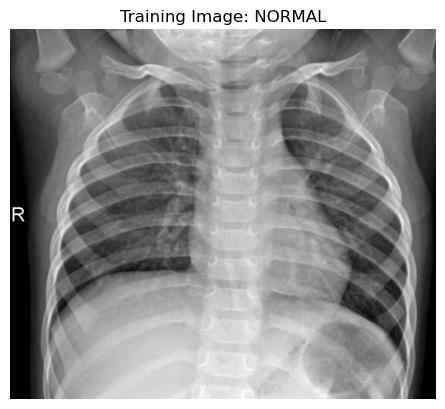

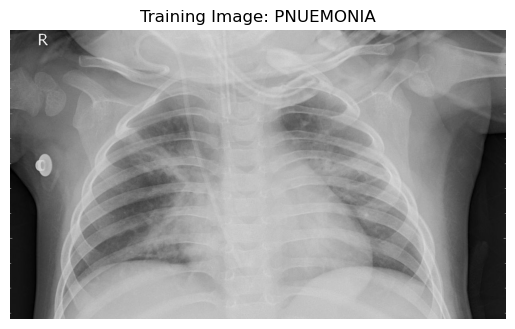

In [3]:
import os

first_normal_image_filename = "C:\\Users\\riakh\\Downloads\\archive (4)\\chest_xray\\train\\NORMAL\\NORMAL2-IM-1327-0001.jpeg"
first_pneumonia_image_filename = "C:\\Users\\riakh\\Downloads\\archive (4)\\chest_xray\\train\\PNEUMONIA\\person9_bacteria_40.jpeg"
if os.path.exists(first_normal_image_filename):
    img_normal = cv2.imread(first_normal_image_filename)
    plt.imshow(cv2.cvtColor(img_normal, cv2.COLOR_BGR2RGB))
    plt.title('Training Image: NORMAL')
    plt.axis('off')
    plt.show()
else:
    print('The image does not exist.')
if os.path.exists(first_pneumonia_image_filename):
    img_normal = cv2.imread(first_pneumonia_image_filename)
    plt.imshow(cv2.cvtColor(img_normal, cv2.COLOR_BGR2RGB))
    plt.title('Training Image: PNUEMONIA')
    plt.axis('off')
    plt.show()
else:
    print('The image does not exist.')    
    

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.concat([df_train, df_test, df_val])
df['result'] = (df['Chest X-Ray'] == 'Pneumonia')
df

,Filename,Label,Chest X-Ray,result
0,C:\Users\riakh\Downloads\archive (4)\chest_xra...,train,Normal,False
1,C:\Users\riakh\Downloads\archive (4)\chest_xra...,train,Normal,False
2,C:\Users\riakh\Downloads\archive (4)\chest_xra...,train,Normal,False
3,C:\Users\riakh\Downloads\archive (4)\chest_xra...,train,Normal,False
4,C:\Users\riakh\Downloads\archive (4)\chest_xra...,train,Normal,False
...,...,...,...,...
3,C:\Users\riakh\Downloads\archive (4)\chest_xra...,val,Pneumonia,True
4,C:\Users\riakh\Downloads\archive (4)\chest_xra...,val,Pneumonia,True
5,C:\Users\riakh\Downloads\archive (4)\chest_xra...,val,Pneumonia,True
6,C:\Users\riakh\Downloads\archive (4)\chest_xra...,val,Pneumonia,True


In [70]:
df['result'].replace(True, 1, inplace=True)
df['result'].replace(False, 0, inplace=True)
df

,Filename,Label,Chest X-Ray,result
0,C:\Users\Hp\Downloads\archive (6)\chest_xray\c...,train,Normal,0
1,C:\Users\Hp\Downloads\archive (6)\chest_xray\c...,train,Normal,0
2,C:\Users\Hp\Downloads\archive (6)\chest_xray\c...,train,Normal,0
3,C:\Users\Hp\Downloads\archive (6)\chest_xray\c...,train,Normal,0
4,C:\Users\Hp\Downloads\archive (6)\chest_xray\c...,train,Normal,0
...,...,...,...,...
3,C:\Users\Hp\Downloads\archive (6)\chest_xray\c...,val,Pneumonia,1
4,C:\Users\Hp\Downloads\archive (6)\chest_xray\c...,val,Pneumonia,1
5,C:\Users\Hp\Downloads\archive (6)\chest_xray\c...,val,Pneumonia,1
6,C:\Users\Hp\Downloads\archive (6)\chest_xray\c...,val,Pneumonia,1


In [71]:
l1, l2, l3 = len(df_train), len(df_train)+len(df_test), len(df_train)+len(df_test)+len(df_val)
train, test, val = df.iloc[:l1, :], df.iloc[l1:l2, :], df.iloc[l2:,:]
val

,Filename,Label,Chest X-Ray,result
0,C:\Users\Hp\Downloads\archive (6)\chest_xray\c...,val,Normal,0
1,C:\Users\Hp\Downloads\archive (6)\chest_xray\c...,val,Normal,0
2,C:\Users\Hp\Downloads\archive (6)\chest_xray\c...,val,Normal,0
3,C:\Users\Hp\Downloads\archive (6)\chest_xray\c...,val,Normal,0
4,C:\Users\Hp\Downloads\archive (6)\chest_xray\c...,val,Normal,0
5,C:\Users\Hp\Downloads\archive (6)\chest_xray\c...,val,Normal,0
6,C:\Users\Hp\Downloads\archive (6)\chest_xray\c...,val,Normal,0
7,C:\Users\Hp\Downloads\archive (6)\chest_xray\c...,val,Normal,0
0,C:\Users\Hp\Downloads\archive (6)\chest_xray\c...,val,Pneumonia,1
1,C:\Users\Hp\Downloads\archive (6)\chest_xray\c...,val,Pneumonia,1


***Reducing the number of pixels to 8 (number of qubits = number of pixels)***

In [72]:
IMG_WIDTH = 2
IMG_HEIGHT = 4

This step reads file paths or names of images from a Pandas DataFrame column named 'Filename'. For each image, it uses the OpenCV library to read, convert to grayscale, resize to specified dimensions (IMG_WIDTH and IMG_HEIGHT), and normalize pixel values to the range [0, 1]. The processed images are stored in a list named images. This routine is a standard preprocessing step in machine learning tasks, ensuring that the image data is appropriately formatted and scaled for model training.

In [73]:
import numpy as np
from PIL import Image
data_xx = df_train['Filename'].iloc[:].to_numpy()
images = []
for i in range(len(df_train)):
    image = cv2.cvtColor(cv2.imread(data_xx[i]), cv2.COLOR_BGR2GRAY)
    img = np.array(image)
    img = (cv2.resize(img, (IMG_WIDTH, IMG_HEIGHT)))/255.
    images.append(img)

In [74]:
import numpy as np
images = np.asarray(images)
print(images.shape)

(5216, 4, 2)


In [75]:
data_yy = df['result'].iloc[:l1]
result = np.array(data_yy)

In [76]:
print(result.shape)

(5216,)


In [10]:
pip install pylatexenc

  Using cached pylatexenc-2.10.tar.gz (162 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136848 sha256=728418e54069dab22a372003ceca9c7e7744511d7fbe0ba3c1744ea0258894d8
  Stored in directory: c:\users\riakh\appdata\local\pip\cache\wheels\b1\7a\33\9fdd892f784ed4afda62b685ae3703adf4c91aa0f524c28f03
Successfully built pylatexenc
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


# **KEY COMPONENTS OF QCNN**

***<span style="font-size:larger;">QUANTUM LAYERS</span>***

**<span style="font-size:larger;">QUANTUM CONVOLUTIONAL LAYER (CIRCUIT ARCHITECTURE)</span>**

In principle, it is conceivable to employ any circuit with adjustable parameters for both the convolutional and pooling layers within our quantum network.

**Circuit Description:**

- **Initialization:**
  - The function `conv_circuit` begins by creating a quantum circuit (`target`) with two qubits.

- **Rotations and Controlled Operations:**
  - `rz(-np.pi / 2, 1)`: A rotation around the Z-axis by an angle of -π/2 is applied to the second qubit.
  - `cx(1, 0)`: A controlled-X (CNOT) gate with the second qubit as the control and the first qubit as the target is applied.
  - `rz(params[0], 0)`: A rotation around the Z-axis by an angle specified by the first parameter (`params[0]`) is applied to the first qubit.
  - `ry(params[1], 1)`: A rotation around the Y-axis by an angle specified by the second parameter (`params[1]`) is applied to the second qubit.
  - `cx(0, 1)`: Another CNOT gate, this time with the first qubit as the control and the second qubit as the target.
  - `ry(params[2], 1)`: Another Y-axis rotation, this time with an angle specified by the third parameter (`params[2]`), applied to the second qubit.
  - `cx(1, 0)`: Another CNOT gate, similar to the one earlier.
  - `rz(np.pi / 2, 0)`: A rotation around the Z-axis by an angle of π/2 is applied to the first qubit.

- **Parameter Vector:**
  - The circuit takes a vector of parameters (`params`) as input, allowing these parameters to be adjusted during the training of a quantum machine learning model.

- **Mathematical Interpretation:**
  - The circuit performs a sequence of quantum rotations and controlled operations, collectively representing a parameterized quantum computation. The parameters (`params`) determine the specific angles of rotation and control the unitary evolution of the qubits.
  - The combination of rotations and controlled operations defines a quantum gate that transforms the quantum state of the qubits. The specific choice of gates and their parameterization allows the circuit to learn and represent complex relationships within the quantum data.

- **Convolution Operation:**
  - The convolutional layer's primary function is to apply local operations to small regions of the quantum state, extracting features relevant to the quantum convolution process.
  - The rotations and controlled operations within the circuit contribute to the convolution operation by recognizing and enhancing patterns within the quantum data.
  - Adaptability of the parameterized circuit ensures that the convolutional layer can learn and encode intricate quantum features, facilitating effective feature extraction.

- **Summary:**
  - The circuit is a parameterized quantum operation for use in quantum machine learning models, adaptable based on parameter values provided during training. This adaptability enables the circuit to learn and perform specific quantum computations tailored to the task at hand.

**Point to note:**
In this tutorial, we intentionally limit the number of parameters in our quantum circuit to expedite training, despite the theoretical requirement of 15 parameters [1]. This compromise, reducing accuracy for efficiency, is acceptable for educational purposes. Our quantum convolutional neural network employs a simplified two-qubit unitary gate with three parameters for practical training.

***Kernel and Its Role in QCNN:***

In the context of quantum convolutional neural networks (QCNN), the term "kernel" refers to the parameterized quantum circuit used for the convolutional layer. The kernel determines the transformations applied to local regions of the input quantum state, extracting features that contribute to the overall quantum convolution.

- **Kernel Adjustment during Training:**
  - The kernel's parameters are adjustable during the training process, allowing the QCNN to learn and adapt to the specific characteristics of the quantum data.

- **Local Feature Extraction:**
  - The kernel performs local operations, recognizing patterns and relationships between qubits in the quantum circuit. This enables the QCNN to capture intricate details and features within the quantum input.

- **Contribution to Quantum Convolution:**
  - As a crucial component of the convolutional layer, the kernel plays a pivotal role in the quantum convolution process. Its adaptability ensures that the QCNN can effectively encode and process quantum information, contributing to the network's overall learning capability.

Understanding and optimizing the kernel is fundamental to enhancing the performance of quantum convolutional layers and, consequently, the overall QCNN model.


c:\Users\riakh\AppData\Local\anaconda3\Lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


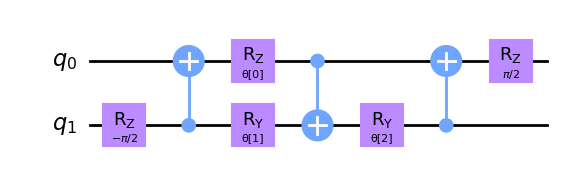

In [15]:
# Define a two qubit unitary 
def conv_circuit(params):
    target = QuantumCircuit(2)
    target.rz(-np.pi / 2, 1)
    target.cx(1, 0)
    target.rz(params[0], 0)
    target.ry(params[1], 1)
    target.cx(0, 1)
    target.ry(params[2], 1)
    target.cx(1, 0)
    target.rz(np.pi / 2, 0)
    return target


#Draw the circuit
params = ParameterVector("θ", length=3)
circuit = conv_circuit(params)
circuit.draw("mpl")

The `conv_layer` function defines a quantum convolutional layer (`Convolutional Layer`) for a specified number of qubits (4 in this example). The layer employs a parameterized quantum circuit with parameters prefixed by "θ." The quantum convolutional layer is structured with pairs of qubits undergoing quantum convolution operations using the `conv_circuit`. The resulting quantum circuit is constructed and visualized by decomposing it into elementary gates using Matplotlib.

- **Quantum Convolution Operations:**
  - Qubits are grouped into pairs, and convolution operations are applied to each pair using the `conv_circuit`.
  - The convolutional operations involve rotations and controlled-X (CNOT) gates, parameterized by the "θ" vector.
  - Barrier operations are added for clarity, separating distinct convolutional operations.

- **Parameterized Flexibility:**
  - The layer's behavior is parameterized, providing adaptability during the training process.
  - Adjusting the parameters in the "θ" vector allows the convolutional layer to learn and capture quantum correlations.

- **Visualization:**
  - The resulting quantum circuit is constructed and visualized by decomposing it into elementary gates using Matplotlib.
  - The visualization offers insights into the architecture and operations of the quantum convolutional layer within the broader quantum circuit.

In summary, the quantum convolutional layer captures quantum correlations through convolution operations, with parameterized flexibility for adaptability and feature extraction in quantum machine learning models.


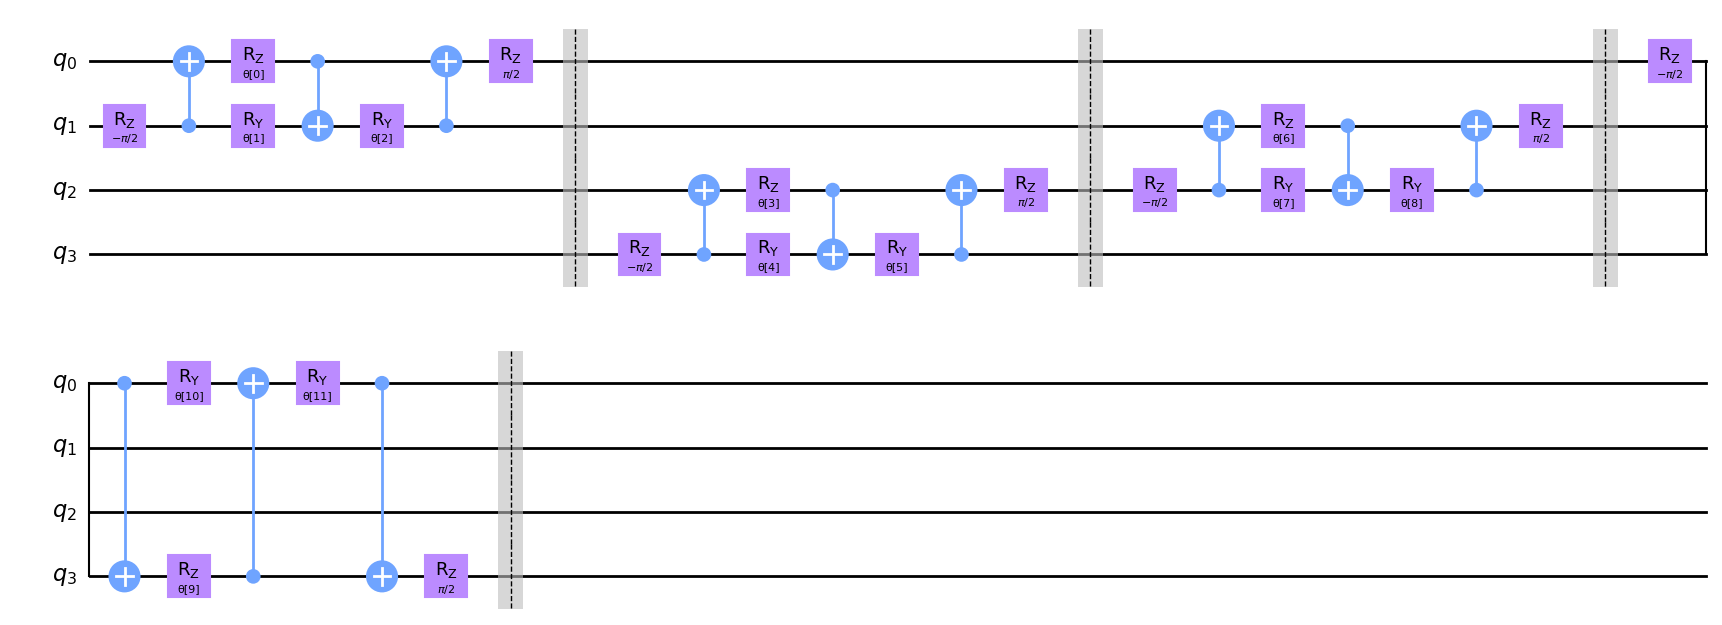

In [78]:
def conv_layer(num_qubits, param_prefix):
    qc = QuantumCircuit(num_qubits, name="Convolutional Layer")
    qubits = list(range(num_qubits))
    param_index = 0
    params = ParameterVector(param_prefix, length=num_qubits * 3)
    for q1, q2 in zip(qubits[0::2], qubits[1::2]):
        qc = qc.compose(conv_circuit(params[param_index : (param_index + 3)]), [q1, q2])
        qc.barrier()
        param_index += 3
    for q1, q2 in zip(qubits[1::2], qubits[2::2] + [0]):
        qc = qc.compose(conv_circuit(params[param_index : (param_index + 3)]), [q1, q2])
        qc.barrier()
        param_index += 3

    qc_inst = qc.to_instruction()

    qc = QuantumCircuit(num_qubits)
    qc.append(qc_inst, qubits)
    return qc


circuit = conv_layer(4, "θ")
circuit.decompose().draw("mpl")

The `conv_layer_size` function calculates the size of a quantum convolutional layer (`Convolutional Layer`) for a specified number of qubits (4 in this example). It employs a parameterized quantum circuit, where each qubit pair undergoes a quantum convolution using the `conv_circuit`. The function then calculates the size of the resulting quantum circuit by decomposing it into its elementary gates and counting their total number. The size of the convolutional layer is then printed out.


In [16]:
from qiskit import QuantumCircuit
from qiskit.circuit.library import RealAmplitudes

def conv_layer_size(num_qubits, param_prefix):
    qc = QuantumCircuit(num_qubits, name="Convolutional Layer")
    qubits = list(range(num_qubits))
    param_index = 0
    params = ParameterVector(param_prefix, length=num_qubits * 3)
    for q1, q2 in zip(qubits[0::2], qubits[1::2]):
        qc = qc.compose(conv_circuit(params[param_index : (param_index + 3)]), [q1, q2])
        qc.barrier()
        param_index += 3
    for q1, q2 in zip(qubits[1::2], qubits[2::2] + [0]):
        qc = qc.compose(conv_circuit(params[param_index : (param_index + 3)]), [q1, q2])
        qc.barrier()
        param_index += 3

    qc_inst = qc.to_instruction()

    qc = QuantumCircuit(num_qubits)
    qc.append(qc_inst, qubits)

    # Calculate the size of the convolutional layer
    conv_layer_size = len(qc.decompose())
    return conv_layer_size

circuit_size = conv_layer_size(4, "θ")
print("Size of the convolutional layer:", circuit_size)


Size of the convolutional layer: 36


**<span style="font-size:larger;">QUANTUM POOLING LAYER(CIRCUIT ARCHITECTURE)</span>**

The quantum pooling layer, implemented by the `pool_circuit` function, serves the purpose of dimensionality reduction and feature extraction in a quantum circuit. The operations within the layer include rotations and controlled-X (CNOT) gates, controlled by parameters in the "θ" vector.

1. **Rotation Operations:**
   - Rotations around the Z-axis and Y-axis are applied to introduce variational parameters, allowing the layer to adapt during training.
   - These rotations enable the quantum pooling layer to capture and manipulate quantum information in different directions.

2. **Controlled-X (CNOT) Gates:**
   - CNOT gates are employed to establish controlled interactions between qubits.
   - The CNOT gate with the second qubit as control and the first qubit as the target enables entanglement and information flow between qubits.

3. **Pooling Effect:**
   - The combination of rotations and CNOT gates creates a pooling effect, where certain quantum states are emphasized or suppressed.
   - The layer's adaptability, facilitated by the "θ" vector, allows it to learn and extract relevant features from the quantum data.

4. **Flexibility in Training:**
   - The parameterized nature of the layer ensures flexibility during the training process, where the values of "θ" are adjusted to minimize the loss function.
   - This adaptability is crucial for the layer to learn and represent complex relationships within the quantum data.

In summary, the quantum pooling layer enhances the quantum circuit's ability to extract meaningful features and reduce the dimensionality of the quantum data, contributing to the overall capabilities of a quantum machine learning model.





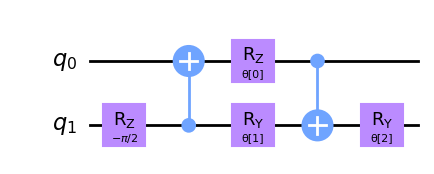

In [80]:
def pool_circuit(params):
    target = QuantumCircuit(2)
    target.rz(-np.pi / 2, 1)
    target.cx(1, 0)
    target.rz(params[0], 0)
    target.ry(params[1], 1)
    target.cx(0, 1)
    target.ry(params[2], 1)

    return target


params = ParameterVector("θ", length=3)
circuit = pool_circuit(params)
circuit.draw("mpl")

The `pool_layer` function defines a quantum pooling layer (`Pooling Layer`) for a specified set of sources and sinks in a quantum circuit. The layer aims to pool information from sources to sinks through parameterized quantum operations. The function takes input sources and sinks, constructs a quantum circuit using a parameter vector "θ," and visualizes the resulting circuit using Matplotlib.

- **Quantum Pooling Operations:**
  - The function iterates through pairs of sources and sinks, applying the `pool_circuit` to each pair.
  - Each pair undergoes quantum pooling operations, including rotations and controlled-X (CNOT) gates, controlled by parameters in the "θ" vector.
  - The barrier operations between pairs provide clarity and separate the distinct pooling operations.

- **Parameterized Flexibility:**
  - The layer's behavior is parameterized by the "θ" vector, allowing for adaptability during the training process.
  - Flexibility in parameter adjustments enables the pooling layer to learn and extract relevant features from the quantum data.

- **Visualization:**
  - The resulting quantum circuit is constructed and visualized by decomposing it into elementary gates using Matplotlib.
  - The visualization provides insight into the structure and operations of the quantum pooling layer within the broader quantum circuit.

In summary, the quantum pooling layer facilitates information transfer from specified sources to sinks, with parameterized operations contributing to the adaptability and feature extraction capabilities of the quantum machine learning model.


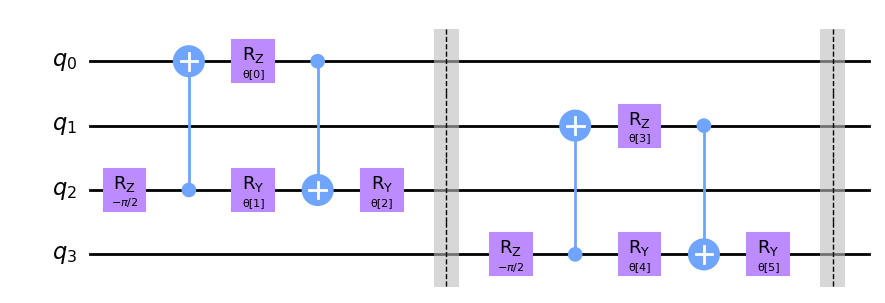

In [81]:
def pool_layer(sources, sinks, param_prefix):
    num_qubits = len(sources) + len(sinks)
    qc = QuantumCircuit(num_qubits, name="Pooling Layer")
    param_index = 0
    params = ParameterVector(param_prefix, length=num_qubits // 2 * 3)
    for source, sink in zip(sources, sinks):
        qc = qc.compose(pool_circuit(params[param_index : (param_index + 3)]), [source, sink])
        qc.barrier()
        param_index += 3

    qc_inst = qc.to_instruction()

    qc = QuantumCircuit(num_qubits)
    qc.append(qc_inst, range(num_qubits))
    return qc


sources = [0, 1]
sinks = [2, 3]
circuit = pool_layer(sources, sinks, "θ")
circuit.decompose().draw("mpl")

The `pool_layer_size` function calculates the size of a quantum pooling layer (`Pooling Layer`) for a specified set of sources and sinks in a quantum circuit. The function constructs a quantum circuit using a parameter vector "θ" and iterates through pairs of sources and sinks, applying the `pool_circuit` to each pair. Barrier operations are included for clarity. The resulting quantum circuit's size is then calculated, representing the number of gates and operations in the pooling layer. The calculated size is printed, providing insights into the layer's complexity within the broader quantum circuit.


In [82]:
from qiskit import QuantumCircuit

def pool_layer_size(sources, sinks, param_prefix):
    num_qubits = len(sources) + len(sinks)
    qc = QuantumCircuit(num_qubits, name="Pooling Layer")
    param_index = 0
    params = ParameterVector(param_prefix, length=num_qubits // 2 * 3)
    for source, sink in zip(sources, sinks):
        qc = qc.compose(pool_circuit(params[param_index : (param_index + 3)]), [source, sink])
        qc.barrier()
        param_index += 3

    # Calculate the size of the pool layer
    pool_layer_size = len(qc)
    return pool_layer_size

sources = [0, 1]
sinks = [2, 3]
param_prefix = "θ"
size = pool_layer_size(sources, sinks, param_prefix)
print("Size of the pool layer:", size)

Size of the pool layer: 14


In [83]:
images = np.array(images)
images_train, images_test, result_train, result_test  = train_test_split(images, result,test_size=0.15)

<span style="font-size:larger;">**FEATURE MAP**</span>

The provided code utilizes Qiskit's `ZFeatureMap` to create a quantum feature map for a system with 8 qubits. A feature map in quantum machine learning is responsible for encoding classical data into a quantum state. The `ZFeatureMap` specifically employs single-qubit rotations around the Z-axis to map classical binary data to quantum states.


The ZFeatureMap in Qiskit uses the Pauli-Z encoding scheme. In this encoding, classical data (typically binary data) is mapped to a quantum state by applying single-qubit rotations around the Z-axis. Each qubit in the feature map undergoes a rotation operation based on the corresponding classical input, with '0' corresponding to no rotation (identity operation) and '1' corresponding to a rotation by a specified angle around the Z-axis.


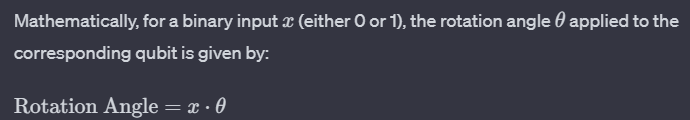



- **Pauli Z Operator:**
  - The Pauli Z operator is a fundamental quantum gate that induces phase shifts on qubits.
  - The first-order Pauli Z-evolution involves applying operations based on the Pauli Z matrix.

- **Quantum Circuit:**
  - The circuit implementing the first-order Pauli Z-evolution is constructed using quantum gates that correspond to the Pauli Z operator.
  - This circuit may involve single-qubit rotations or controlled operations, depending on the specific implementation.

- **Purpose and Applications:**
  - The Pauli Z-evolution circuit is used for tasks such as quantum state preparation, encoding information, or as a building block in quantum algorithms.
  - Its applications extend to quantum machine learning, where it can contribute to feature maps, encoding strategies, or variational circuits.


In summary, the "first order Pauli Z-evolution circuit" represents a quantum circuit designed to implement the evolution generated by the Pauli Z operator. Its versatility makes it a valuable component in quantum algorithms and machine learning workflows.




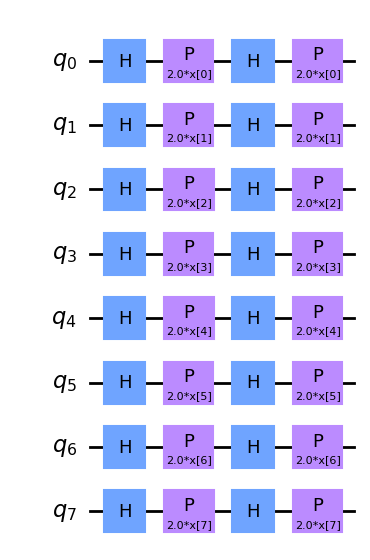

In [84]:
feature_map = ZFeatureMap(8)
feature_map.decompose().draw("mpl")

In [195]:
pip install tensorflow



  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/fb/59/3eb58629e3749d9f4fc1e522487af369f9bd4c451f465d3054961fab6bf8/tensorflow-2.13.1-cp38-cp38-win_amd64.whl.metadata
INFO: pip is looking at multiple versions of tensorflow to determine which version is compatible with other requirements. This could take a while.
  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/5b/6f/8b125d126d54061c0be610b135aaf2f8960f55c2e185ac32445e4a5012d5/tensorflow-2.13.0-cp38-cp38-win_amd64.whl.metadata
  Using cached tensorflow-2.13.0-cp38-cp38-win_amd64.whl.metadata (2.6 kB)
  Obtaining dependency information for tensorflow-intel==2.13.0 from https://files.pythonhosted.org/packages/38/ba/dd4d998a852451e98dc009ecb208bbb0eeb0c8252dc35b7c4e1050762b36/tensorflow_intel-2.13.0-cp38-cp38-win_amd64.whl.metadata
  Using cached tensorflow_intel-2.13.0-cp38-cp38-win_amd64.whl.metadata (4.1 kB)
  Using cached astunparse-1.6.3-py2.p

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
azure-core 1.29.4 requires typing-extensions>=4.6.0, but you have typing-extensions 4.5.0 which is incompatible.
filelock 3.12.3 requires typing-extensions>=4.7.1; python_version < "3.11", but you have typing-extensions 4.5.0 which is incompatible.


In [85]:
#Optional
from tensorflow.keras.layers import Dense  #To include a Dense layer 

# **<span style="font-size:larger;">Quantum Neural Network (QNN) Components</span>**

- **Ansatz:**
  - In quantum machine learning, an ansatz is a parameterized quantum circuit that serves as a hypothesis for the quantum model. It represents the trial quantum state that undergoes parameter tuning during the training process. The provided code defines an ansatz (`ansatz`) quantum circuit with convolutional and pooling layers.

- **EstimatorQNN:**
  - `EstimatorQNN` is a Qiskit class used to define a quantum neural network for training. It requires the following components:
    - `circuit`: The parameterized quantum circuit, which includes both the feature map and ansatz. The circuit is decomposed to facilitate training.
    - `observables`: The measurement operator specifying the quantity of interest. In this case, it is a SparsePauliOp representing the Pauli-Z operator acting on the first qubit.
    - `input_params`: The parameters associated with the feature map. These are the parameters adjusted during training to encode input data into a quantum state.
    - `weight_params`: The parameters associated with the ansatz. These are the parameters adjusted during training to learn the quantum model.

- **Observable (Measurement Operator):**
  - The `observable` defines the quantity to be measured during the training of the quantum neural network. It represents the operator whose expectation value is computed. In this code, the observable is a SparsePauliOp that measures the Pauli-Z operator on the first qubit. The choice of the observable influences the learning task and the information extracted from the quantum state.

- **Binary Classification Task:**
  - The provided code sets up a binary classification task by measuring a single qubit (`Pauli-Z` on the first qubit) in the observable. The outcome of this measurement will be used to determine the binary classification result during training.

***Code Explanation:***
The code combines the feature map, ansatz, and observable to create a quantum neural network (QNN) for binary classification. It defines a specific binary classification task by measuring the Pauli-Z operator on the first qubit. The ansatz represents the quantum model with convolutional and pooling layers, while the observable specifies the quantity of interest for the binary classification outcome.


In [86]:
feature_map = ZFeatureMap(8)

ansatz = QuantumCircuit(8, name="Ansatz")

# First Convolutional Layer
ansatz.compose(conv_layer(8, "с1"), list(range(8)), inplace=True)

# First Pooling Layer
ansatz.compose(pool_layer([0, 1, 2, 3], [4, 5, 6, 7], "p1"), list(range(8)), inplace=True)

# Second Convolutional Layer
ansatz.compose(conv_layer(4, "c2"), list(range(4, 8)), inplace=True)

# Second Pooling Layer
ansatz.compose(pool_layer([0, 1], [2, 3], "p2"), list(range(4, 8)), inplace=True)

# Third Convolutional Layer
ansatz.compose(conv_layer(2, "c3"), list(range(6, 8)), inplace=True)

# Third Pooling Layer
ansatz.compose(pool_layer([0], [1], "p3"), list(range(6, 8)), inplace=True)

# Combining the feature map and ansatz
circuit = QuantumCircuit(8)
circuit.compose(feature_map, range(8), inplace=True)
circuit.compose(ansatz, range(8), inplace=True)

observable = SparsePauliOp.from_list([("Z" + "I" * 7, 1)])

# we decompose the circuit for the QNN to avoid additional data copying
qnn = EstimatorQNN(
    circuit=circuit.decompose(),
    observables=observable,
    input_params=feature_map.parameters,
    weight_params=ansatz.parameters,
)


Prints the gradients of the QNN with respect to its input parameters, offering information about how the QNN output changes concerning changes in its input parameters during training.

The output False in the context of qnn.input_gradients likely indicates that the input gradients are not computed or available for the Quantum Neural Network (QNN). In some quantum machine learning frameworks, the computation of gradients for quantum circuits can be resource-intensive, and as a result, users may need to explicitly request or enable the computation of gradients.

In [88]:
print(qnn.input_gradients)

False


Prints the parameters associated with the input (feature map) of the Quantum Neural Network (QNN).

In [89]:
print(qnn.input_params)

[ParameterVectorElement(x[0]), ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3]), ParameterVectorElement(x[4]), ParameterVectorElement(x[5]), ParameterVectorElement(x[6]), ParameterVectorElement(x[7])]


Prints the number of input parameters in the Quantum Neural Network (QNN), revealing the dimensionality of the input space.

In [90]:
print(qnn.num_inputs)

8


Prints the number of weight parameters in the QNN, indicating the count of tunable parameters associated with the network's trainable elements.

In [91]:
print(qnn.num_weights)

63


Retrieves and prints the output shape of the QNN, providing information about the dimensionality of the QNN's output.

In [92]:
output_shape = qnn.output_shape
print(output_shape)


(1,)


 Prints the parameters associated with the ansatz (parametrized circuit) in the QNN, showing the tunable elements in the ansatz.

In [93]:
print(ansatz.parameters)

ParameterView([ParameterVectorElement(c2[0]), ParameterVectorElement(c2[1]), ParameterVectorElement(c2[2]), ParameterVectorElement(c2[3]), ParameterVectorElement(c2[4]), ParameterVectorElement(c2[5]), ParameterVectorElement(c2[6]), ParameterVectorElement(c2[7]), ParameterVectorElement(c2[8]), ParameterVectorElement(c2[9]), ParameterVectorElement(c2[10]), ParameterVectorElement(c2[11]), ParameterVectorElement(c3[0]), ParameterVectorElement(c3[1]), ParameterVectorElement(c3[2]), ParameterVectorElement(c3[3]), ParameterVectorElement(c3[4]), ParameterVectorElement(c3[5]), ParameterVectorElement(p1[0]), ParameterVectorElement(p1[1]), ParameterVectorElement(p1[2]), ParameterVectorElement(p1[3]), ParameterVectorElement(p1[4]), ParameterVectorElement(p1[5]), ParameterVectorElement(p1[6]), ParameterVectorElement(p1[7]), ParameterVectorElement(p1[8]), ParameterVectorElement(p1[9]), ParameterVectorElement(p1[10]), ParameterVectorElement(p1[11]), ParameterVectorElement(p2[0]), ParameterVectorEleme



The following circuit diagram shows that the quantum neural network (QNN) circuit architecture presented in the code involves a series of convolutional and pooling layers.

- **First Convolutional Layer:**
  - The first convolutional layer (`conv_layer(8, "с1")`) operates on all eight qubits, capturing relationships through parameterized quantum operations.

- **First Pooling Layer:**
  - The first pooling layer (`pool_layer([0, 1, 2, 3], [4, 5, 6, 7], "p1")`) compresses the quantum state by combining information from neighboring qubits, facilitating feature extraction.

- **Second Convolutional Layer:**
  - The second convolutional layer (`conv_layer(4, "c2")`) operates on a reduced set of qubits (4 to 8), capturing refined relationships after the first pooling layer.

- **Second Pooling Layer:**
  - The second pooling layer (`pool_layer([0, 1], [2, 3], "p2")`) further compresses the quantum state, enhancing the QNN's ability to capture relevant information.

- **Third Convolutional Layer:**
  - The third convolutional layer (`conv_layer(2, "c3")`) focuses on the remaining qubits (6 to 8), extracting intricate features from the reduced quantum state.

- **Third Pooling Layer:**
  - The third pooling layer (`pool_layer([0], [1], "p3")`) compresses the quantum state to a minimal set of qubits, preparing for the final classification layer.

- **Hierarchical Approach:**
  - The architecture follows a hierarchical approach, with each convolutional layer extracting features from the reduced quantum state produced by the previous pooling layer.

- **Connectivity and Operations:**
  - The resulting circuit diagram illustrates the connectivity and operations of the convolutional and pooling layers, providing insight into the QNN's ability to capture complex quantum relationships.


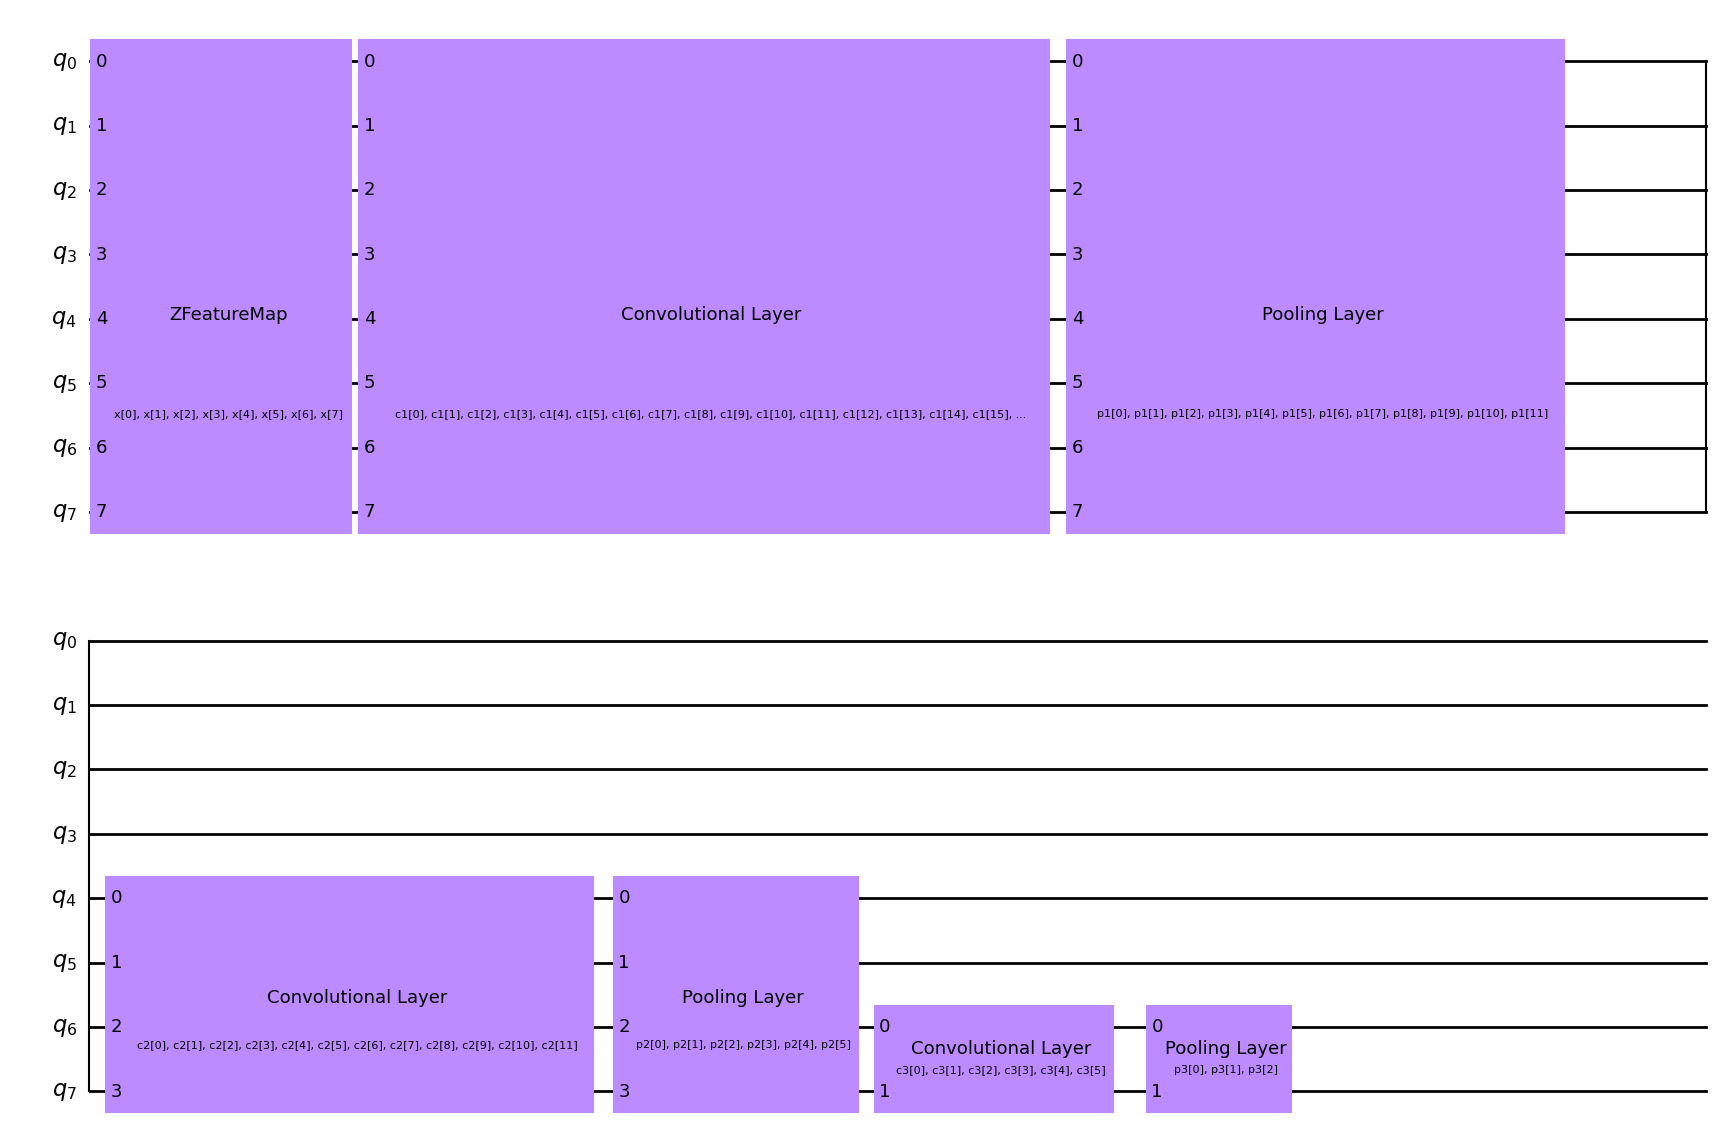

In [94]:
circuit.draw("mpl")

The following code snippet defines a callback function (callback_graph) for monitoring the objective function values during the optimization process. The objective_func_vals list stores the values of the objective function at each iteration. The function uses clear_output to update the displayed graph dynamically, avoiding clutter. The graph is plotted against the iteration number, providing a visual representation of the optimization progress. The x-axis corresponds to the iteration count, while the y-axis represents the objective function value. This real-time graph allows users to observe how the objective function evolves over iterations, offering insights into the optimization convergence and performance. This callback is particularly useful for visualizing and analyzing the optimization dynamics in quantum machine learning experiments.

In [110]:
objective_func_vals = []

def callback_graph(weights, obj_func_eval):
    clear_output(wait=True)
    objective_func_vals.append(obj_func_eval)
    plt.title("Objective function value against iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Objective function value")
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    plt.show()

In [111]:
x = np.array(images_train)
y = np.array(result_train)

In [112]:
x_reshaped = x.reshape(4433, 8)

In [123]:
print(images_test.shape)

(783, 4, 2)


In [125]:
images_test_reshaped = images_test.reshape(783, 8)

In [126]:
print(images_test_reshaped.shape)

(783, 8)


In [113]:
print(x_reshaped.shape)

(4433, 8)


In [114]:
print(x.shape)

(4433, 4, 2)


In [115]:
print(y.shape)

(4433,)


In [116]:
print(images_train.shape)

(4433, 4, 2)


In [117]:
print(result_train.shape)

(4433,)


In [118]:
print(np.unique(y))

[0 1]


In [119]:
print("Input data shape:", x.shape)
print("Target labels shape:", y.shape)
print("Unique target labels:", np.unique(y))


Input data shape: (4433, 4, 2)
Target labels shape: (4433,)
Unique target labels: [0 1]


In [120]:
unique_values = np.unique(y)

# Check the unique values
if len(unique_values) == 2 and set(unique_values) == {0, 1}:
    print("Binary classification")
else:
    print("Multi-class classification")

Binary classification


# **RESULTS**

__Test-Train Split Ratio - 0.15__

The code initializes a neural network classifier (`classifier`) with a Quantum Neural Network (QNN) and sets the optimizer to COBYLA. COBYLA is a derivative-free optimization algorithm that works well for optimizing functions with unknown gradients or noisy evaluations. The `maxiter` parameter is set to 200, defining the maximum number of iterations for the optimization process. Additionally, a callback function (`callback_graph`) is specified to visualize the optimization progress during training.

The initial values for the QNN parameters are generated randomly using NumPy, creating an initial point array (`initial_point_array`). This array is then utilized as the starting point for the COBYLA optimizer.

The `fit` method is invoked to train the classifier on input data (`x_reshaped`) and corresponding labels (`y`). The COBYLA optimizer iteratively refines the QNN parameters to minimize the objective function, and the optimization progress is visualized using the specified callback.

In summary, this code segment demonstrates the usage of COBYLA for training a quantum neural network classifier, leveraging its derivative-free optimization capabilities for the QNN parameter optimization.


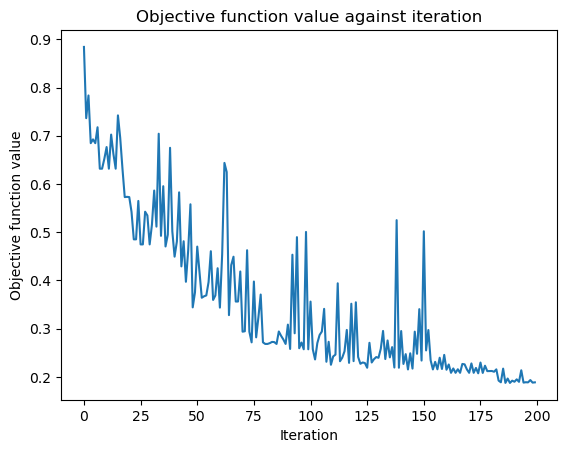

In [121]:
import numpy as np

# Generate random initial values for 63 parameters
initial_values = np.random.rand(63)

# Create the initial_point_array
initial_point_array = np.array(initial_values)

classifier = NeuralNetworkClassifier(
    qnn,
    optimizer=COBYLA(maxiter=200),  # Set max iterations
    callback=callback_graph,
    initial_point=initial_point_array,  # Use the NumPy array
)

# Fit the classifier
classifier.fit(x_reshaped, y)


In [127]:
predictions = classifier.predict(images_test_reshaped)

from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(result_test, predictions)
report = classification_report(result_test, predictions)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.7535121328224776
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       193
           1       0.75      1.00      0.86       590

    accuracy                           0.75       783
   macro avg       0.38      0.50      0.43       783
weighted avg       0.57      0.75      0.65       783



C:\Users\Hp\anaconda3\envs\gan\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Hp\anaconda3\envs\gan\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Hp\anaconda3\envs\gan\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


__Test-Train Split Ratio - 0.30__

In [128]:
images = np.array(images)
images_train, images_test, result_train, result_test  = train_test_split(images, result,test_size=0.30)

In [129]:
x = np.array(images_train)
y = np.array(result_train)

In [130]:
print(x.shape)

(3651, 4, 2)


In [132]:
x_reshaped = x.reshape(3651, 8)
print(x_reshaped.shape)

(3651, 8)


In [133]:
print(y.shape)

(3651,)


In [136]:
print(images_test.shape)

(1565, 4, 2)


In [138]:
images_test_reshaped = images_test.reshape(1565, 8)

In [139]:
print(images_test_reshaped.shape)

(1565, 8)


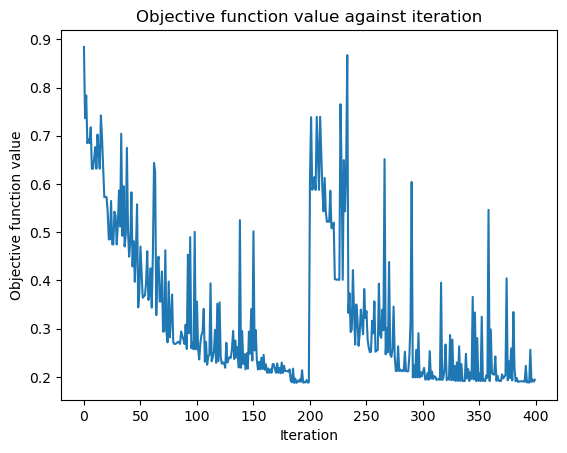

In [134]:
import numpy as np

# Generate random initial values for 63 parameters
initial_values = np.random.rand(63)

# Create the initial_point_array
initial_point_array = np.array(initial_values)

classifier = NeuralNetworkClassifier(
    qnn,
    optimizer=COBYLA(maxiter=200),  # Set max iterations
    callback=callback_graph,
    initial_point=initial_point_array,  # Use the NumPy array
)

# Fit the classifier
classifier.fit(x_reshaped, y)


In [140]:
predictions = classifier.predict(images_test_reshaped)

from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(result_test, predictions)
report = classification_report(result_test, predictions)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.7354632587859425
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       414
           1       0.74      1.00      0.85      1151

    accuracy                           0.74      1565
   macro avg       0.37      0.50      0.42      1565
weighted avg       0.54      0.74      0.62      1565



C:\Users\Hp\anaconda3\envs\gan\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Hp\anaconda3\envs\gan\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Hp\anaconda3\envs\gan\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


__Test-train Split Ratio - 0.40__

In [141]:
images = np.array(images)
images_train, images_test, result_train, result_test  = train_test_split(images, result,test_size=0.40)

In [142]:
x = np.array(images_train)
y = np.array(result_train)

In [143]:
print(x.shape)

(3129, 4, 2)


In [145]:
x_reshaped = x.reshape(3129, 8)
print(x_reshaped.shape)

(3129, 8)


In [146]:
print(y.shape)

(3129,)


In [147]:
print(images_test.shape)

(2087, 4, 2)


In [149]:
images_test_reshaped = images_test.reshape(2087, 8)

In [150]:
print(images_test_reshaped.shape)

(2087, 8)


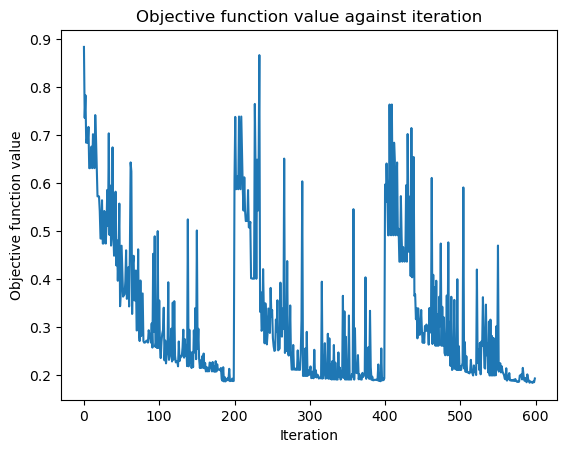

In [151]:
import numpy as np

# Generate random initial values for 63 parameters
initial_values = np.random.rand(63)

# Create the initial_point_array
initial_point_array = np.array(initial_values)

classifier = NeuralNetworkClassifier(
    qnn,
    optimizer=COBYLA(maxiter=200),  # Set max iterations
    callback=callback_graph,
    initial_point=initial_point_array,  # Use the NumPy array
)

# Fit the classifier
classifier.fit(x_reshaped, y)


In [152]:
predictions = classifier.predict(images_test_reshaped)

from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(result_test, predictions)
report = classification_report(result_test, predictions)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.7345471969333972
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       554
           1       0.73      1.00      0.85      1533

    accuracy                           0.73      2087
   macro avg       0.37      0.50      0.42      2087
weighted avg       0.54      0.73      0.62      2087



C:\Users\Hp\anaconda3\envs\gan\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Hp\anaconda3\envs\gan\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Hp\anaconda3\envs\gan\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


__Test-train Split Ratio - 0.50__

In [153]:
images = np.array(images)
images_train, images_test, result_train, result_test  = train_test_split(images, result,test_size=0.50)

In [154]:
x = np.array(images_train)
y = np.array(result_train)

In [155]:
print(y.shape)

(2608,)


In [163]:
x_reshaped = x.reshape(2608, 8)
print(x_reshaped.shape)

(2608, 8)


In [156]:
print(images_test.shape)

(2608, 4, 2)


In [158]:
images_test_reshaped = images_test.reshape(2608, 8)

In [159]:
print(images_test_reshaped.shape)

(2608, 8)


In [161]:
print(y.shape)

(2608,)


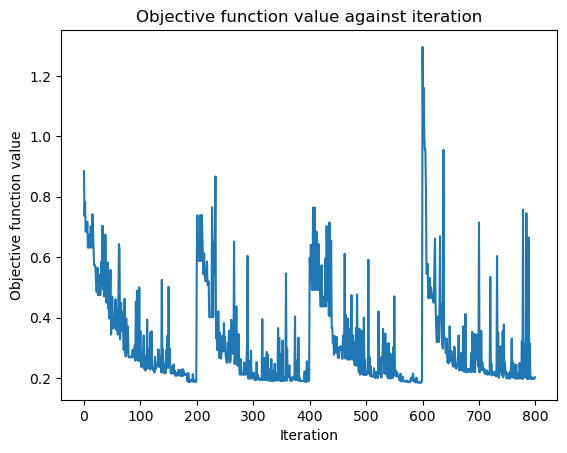

In [164]:
import numpy as np

# Generate random initial values for 63 parameters
initial_values = np.random.rand(63)

# Create the initial_point_array
initial_point_array = np.array(initial_values)

classifier = NeuralNetworkClassifier(
    qnn,
    optimizer=COBYLA(maxiter=200),  # Set max iterations
    callback=callback_graph,
    initial_point=initial_point_array,  # Use the NumPy array
)

# Fit the classifier
classifier.fit(x_reshaped, y)


In [165]:
predictions = classifier.predict(images_test_reshaped)

from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(result_test, predictions)
report = classification_report(result_test, predictions)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.7526840490797546
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       645
           1       0.75      1.00      0.86      1963

    accuracy                           0.75      2608
   macro avg       0.38      0.50      0.43      2608
weighted avg       0.57      0.75      0.65      2608



C:\Users\Hp\anaconda3\envs\gan\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Hp\anaconda3\envs\gan\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Hp\anaconda3\envs\gan\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# References

1. [Quantum Mechanics and Quantum Information](https://arxiv.org/pdf/quant-ph/0308006.pdf)
2. [PennyLane Quanvolution Tutorial](https://pennylane.ai/qml/demos/tutorial_quanvolution/)
3. [Qiskit ZFeatureMap Documentation](https://docs.quantum.ibm.com/api/qiskit/0.19/qiskit.circuit.library.ZFeatureMap)
4. [Qiskit EstimatorQNN Documentation](https://docs.quantum.ibm.com/api/qiskit/qiskit.algorithms.optimizers.COBYLA)
5. [Qiskit COBYLA Optimizer Documentation](https://qiskit.org/ecosystem/machine-learning/stubs/qiskit_machine_learning.neural_networks.EstimatorQNN.html)
6. [IBM Quantum Machine Learning Tutorials - Quantum Convolutional Neural Networks](https://qiskit.org/ecosystem/machinelearning/tutorials/11_quantum_convolutional_neural_networks.html#7.-References)


Link to dataset - https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia/data

# About the Author

Hi, I am Ria Khatoniar, a third-year undergraduate student pursuing Integrated Masters in Physics and B.E. in Computer Science and Engineering from BITS Pilani Goa Campus. My fascination with the immense potential of quantum computing has led me to delve into the field of quantum machine learning.As a KALPANA STEM Incubator fellow, I started developing interest in scientific research. I have gained research experience through internships at CDAC, Pune, National Chemical Laboratory, Pune, IIIT Hyderabad, and IIT Guwahati. Additionally, I've worked as a Quantum Researcher and Developer at Qubrid, Dihuni, USA, further enriching my expertise in quantum machine learning. With profound enthusiasm for the evolving quantum landscape, I aspire to explore its intricacies and pursue higher studies in the same. 

Feel free to connect with me! You can reach out to me via:
- Email: riakhatoniar1234@gmail.com
- LinkedIn: [Ria Khatoniar](https://www.linkedin.com/in/ria-khatoniar-275061207/?originalSubdomain=in)



<sub>*CHECK CNN CODE FOR EQUIVALENT DEMONSTRATION USING THE SAME DATASET*</sub>

<sub>*KEY TAKEAWAY FROM COMPARISON OF CNN AND QCNN ON A DATASET WITH HIGHLY REDUCED NUMBER OF FEATURES*</sub>

<sub>The study suggests that Quantum Convolutional Neural Networks (QCNNs) have the potential to extract more meaningful information from smaller datasets, offering advantages in applications with challenging or expensive feature extraction and data collection. This ability may arise from QCNNs leveraging quantum phenomena like superposition and entanglement to process information differently from classical models. While QCNNs are in early development, their promise in handling reduced-feature training data is significant, particularly in domains with resource constraints.</sub>

<sub>The study acknowledges the need for scaling up and testing on diverse datasets. In comparison to classical Convolutional Neural Networks (CNNs) evaluated on pneumonia images reduced to 8 pixels, QCNN demonstrated superior performance across various train-test splits (0.15, 0.30, 0.40, 0.50), with accuracy rates consistently outperforming CNN (75% vs. 56.25%). These findings suggest QCNN's potential for revolutionizing image classification, especially in scenarios with limited data availability.</sub>
